# Assignment 2 - Image Correction

In [1]:
import cv2
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from utils import equalize_hist, gamma_correction

In [2]:
images = []
data_src = Path("data")

for img in data_src.iterdir():
    images.append(cv2.imread(str(img)))

images = np.array(images)

In [3]:
print(images.shape)

(6, 1000, 1000, 3)


In [4]:
def convert(images, cvt_type):
    new_images = []
    for img in images:
        new_images.append(cv2.cvtColor(img, cvt_type))
    return np.array(new_images)

In [5]:
gray_images = convert(images, cv2.COLOR_BGR2GRAY)
rgb_images = convert(images, cv2.COLOR_BGR2RGB)
ycrcb_images = convert(images, cv2.COLOR_BGR2YCrCb)
hsv_images = convert(images, cv2.COLOR_BGR2HSV)
xyz_images = convert(images, cv2.COLOR_BGR2XYZ)
lab_images = convert(images, cv2.COLOR_BGR2LAB)

for arr in [gray_images, rgb_images, ycrcb_images, hsv_images, xyz_images, lab_images]:
    print(arr.shape)

(6, 1000, 1000)
(6, 1000, 1000, 3)
(6, 1000, 1000, 3)
(6, 1000, 1000, 3)
(6, 1000, 1000, 3)
(6, 1000, 1000, 3)


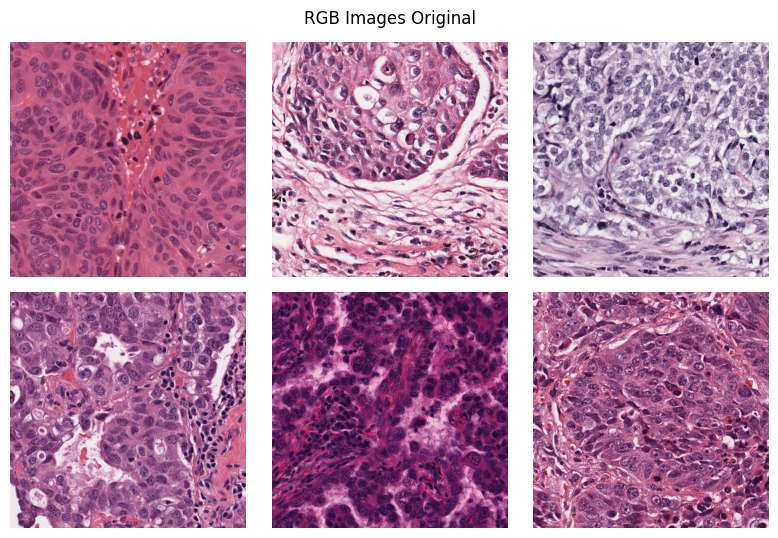

In [6]:
fig = plt.figure(figsize=(8, 8))
fig.suptitle("RGB Images Original")

rows = 3
columns = 3

for i, img in enumerate(rgb_images):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.imshow(img)

plt.tight_layout()
plt.show()

## Histograms

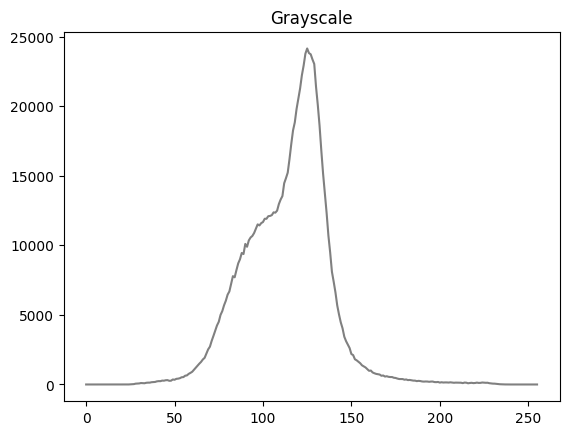

In [7]:
gray_hist = cv2.calcHist([gray_images[0]], [0], None, [256], [0, 255])
plt.plot(gray_hist, color="gray")
plt.title("Grayscale")
plt.show()

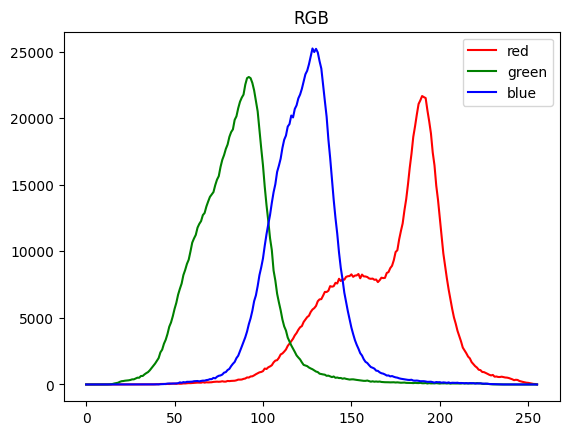

In [8]:
for i, color in enumerate(["red", "green", "blue"]):
    hist = cv2.calcHist([rgb_images[0]], [i], None, [256], [0, 255])
    plt.plot(hist, color=color, label=color)
plt.legend()
plt.title("RGB")
plt.show()

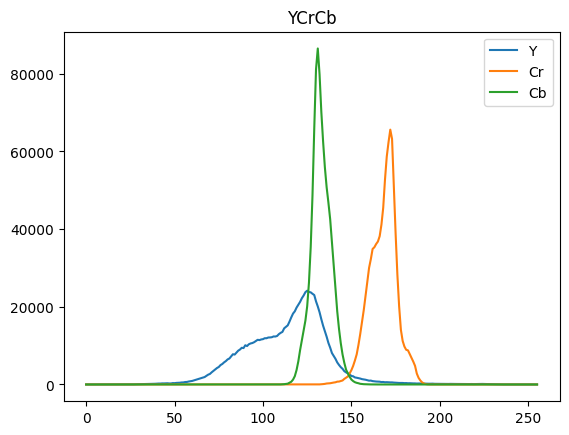

In [9]:
for i, label in enumerate(["Y", "Cr", "Cb"]):
    hist = cv2.calcHist([ycrcb_images[0]], [i], None, [256], [0, 255])
    plt.plot(hist, label=label)
plt.legend()
plt.title("YCrCb")
plt.show()

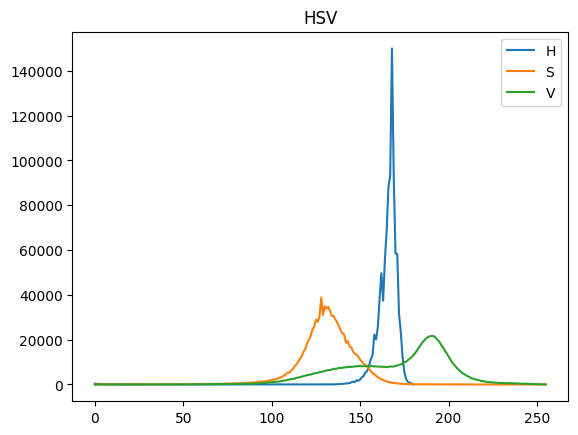

In [10]:
for i, (label, range_ch) in enumerate(zip(["H", "S", "V"], [[0, 180], [0, 255], [0, 255]])):
    hist = cv2.calcHist([hsv_images[0]], [i], None, [range_ch[1]+1], range_ch)
    plt.plot(hist, label=label)
plt.legend()
plt.title("HSV")
plt.show()

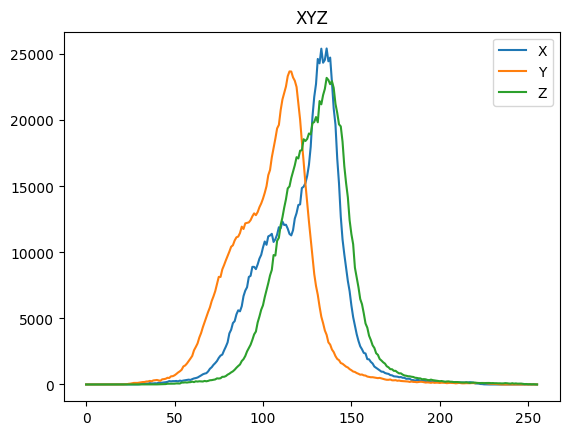

In [11]:
for i, label in enumerate(["X", "Y", "Z"]):
    hist = cv2.calcHist([xyz_images[0]], [i], None, [256], [0, 255])
    plt.plot(hist, label=label)
plt.legend()
plt.title("XYZ")
plt.show()

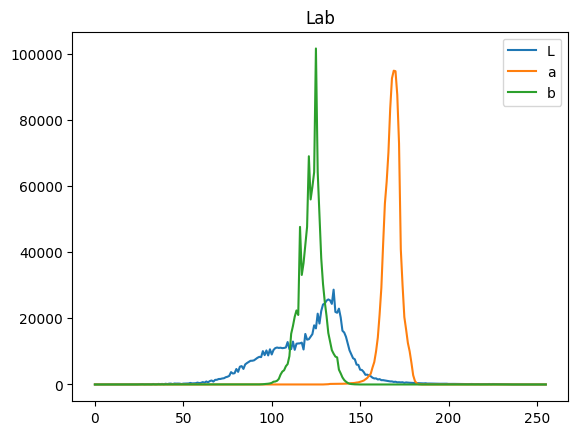

In [12]:
for i, label in enumerate(["L", "a", "b"]):
    hist = cv2.calcHist([lab_images[0]], [i], None, [256], [0, 255])
    plt.plot(hist, label=label)
plt.legend()
plt.title("Lab")
plt.show()

## Histogram equalization

### Grayscale

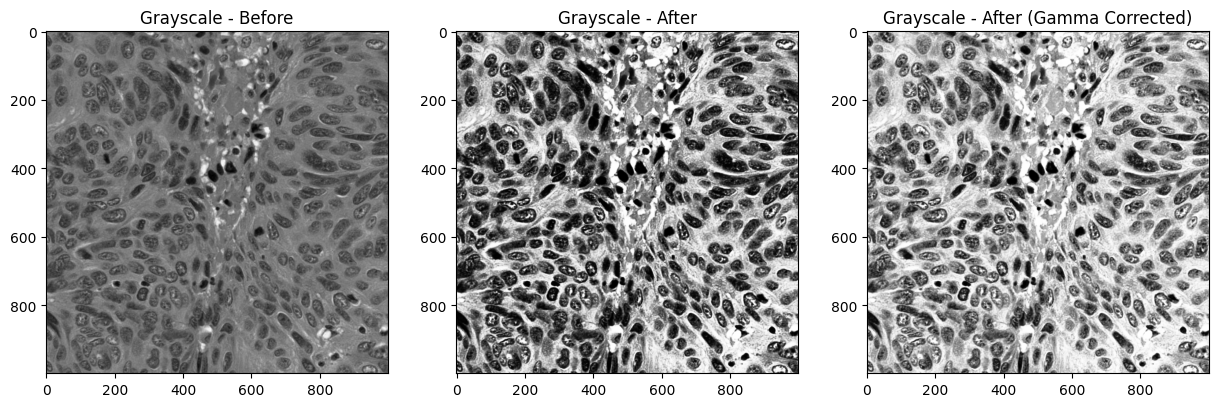

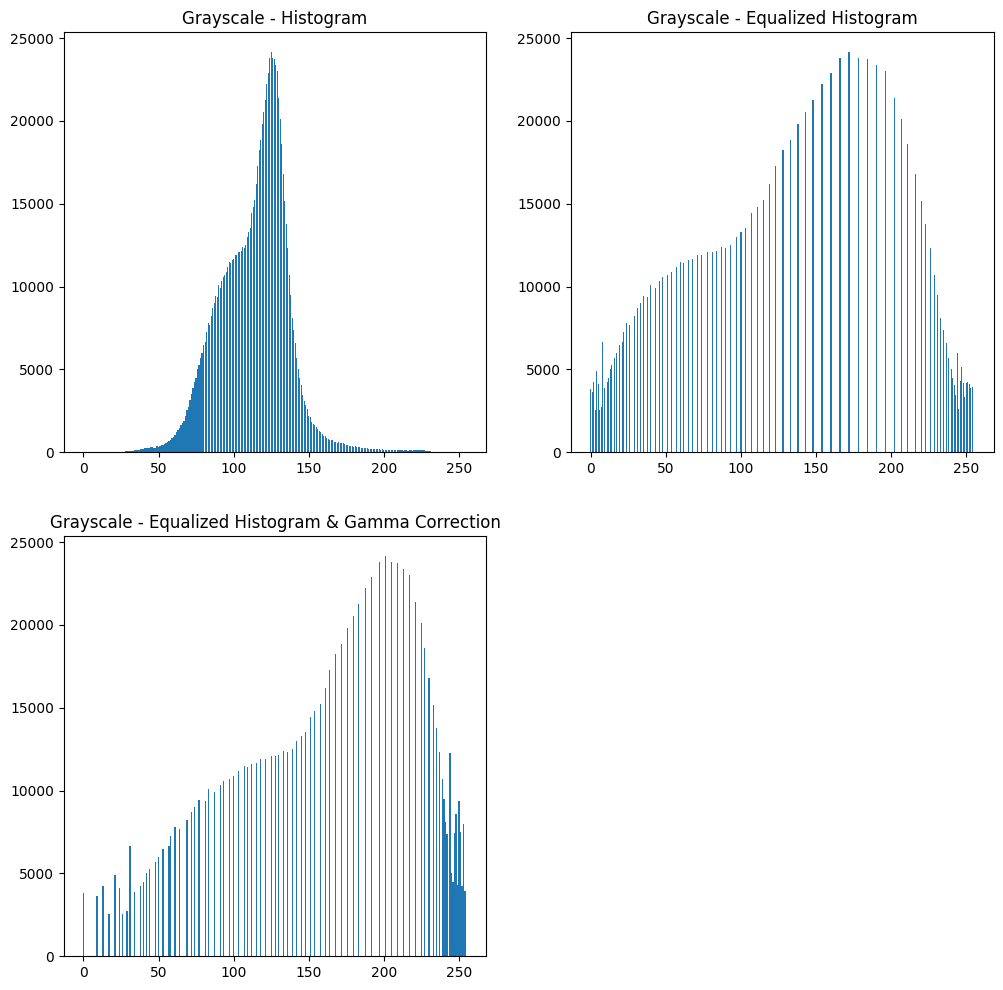

In [13]:
img = gray_images[0]
img_equalized = equalize_hist(img, 256)
img_eq_gamma_corrected = gamma_correction(img_equalized, 0.6, 255)

gray_hist_before = cv2.calcHist([img], [0], None, [256], [0, 255]).reshape((256,))
gray_hist_after = cv2.calcHist([img_equalized], [0], None, [256], [0, 255]).reshape((256,))
gray_hist_after_gamma = cv2.calcHist([img_eq_gamma_corrected], [0], None, [256], [0, 255]).reshape((256,))

fig = plt.figure(figsize=(15, 45))

rows = 1
columns = 3

fig.add_subplot(rows, columns, 1)
plt.title("Grayscale - Before")
plt.imshow(img, cmap="gray")

fig.add_subplot(rows, columns, 2)
plt.title("Grayscale - After")
plt.imshow(img_equalized, cmap="gray")

fig.add_subplot(rows, columns, 3)
plt.title("Grayscale - After (Gamma Corrected)")
plt.imshow(img_eq_gamma_corrected, cmap="gray")

plt.show()

rows = 2
columns = 2

fig = plt.figure(figsize=(12, 12))
x = np.arange(256)

fig.add_subplot(rows, columns, 1)
plt.title("Grayscale - Histogram")
plt.bar(x, gray_hist_before)

fig.add_subplot(rows, columns, 2)
plt.title("Grayscale - Equalized Histogram")
plt.bar(x, gray_hist_after)

fig.add_subplot(rows, columns, 3)
plt.title("Grayscale - Equalized Histogram & Gamma Correction")
plt.bar(x, gray_hist_after_gamma)

plt.show()

### RGB

In [14]:
img = rgb_images[0]
channels = cv2.split(img)

img_equalized = []
img_eq_gamma_corrected = []

for i, color in enumerate(["red", "green", "blue"]):
    ch_equalized = equalize_hist(channels[i], 256)
    ch_eq_gamma_corrected = gamma_correction(ch_equalized, 0.6, 255)

    img_equalized.append(ch_equalized)
    img_eq_gamma_corrected.append(ch_eq_gamma_corrected)

img_equalized = cv2.merge(img_equalized)
img_eq_gamma_corrected = cv2.merge(img_eq_gamma_corrected)

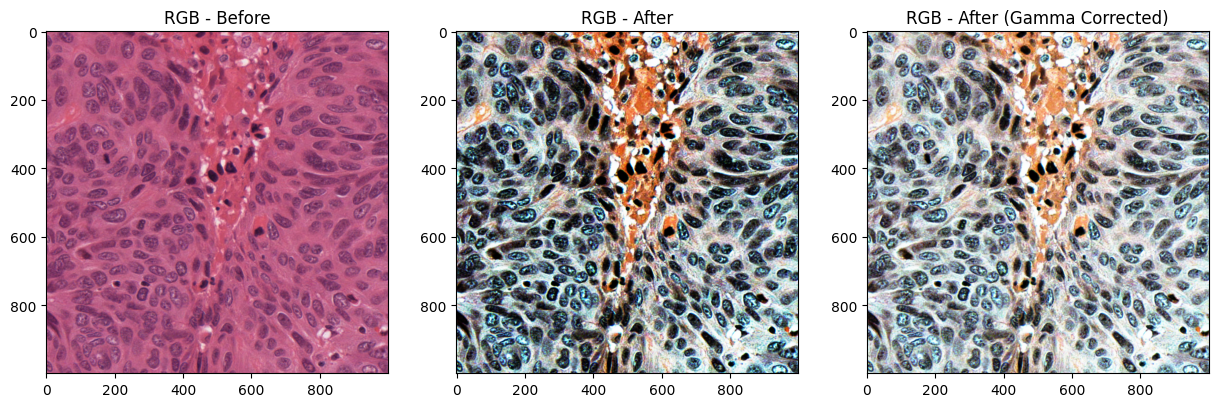

In [15]:
fig = plt.figure(figsize=(15, 45))

rows = 1
columns = 3

fig.add_subplot(rows, columns, 1)
plt.title("RGB - Before")
plt.imshow(img)

fig.add_subplot(rows, columns, 2)
plt.title("RGB - After")
plt.imshow(img_equalized)

fig.add_subplot(rows, columns, 3)
plt.title("RGB - After (Gamma Corrected)")
plt.imshow(img_eq_gamma_corrected)

plt.show()

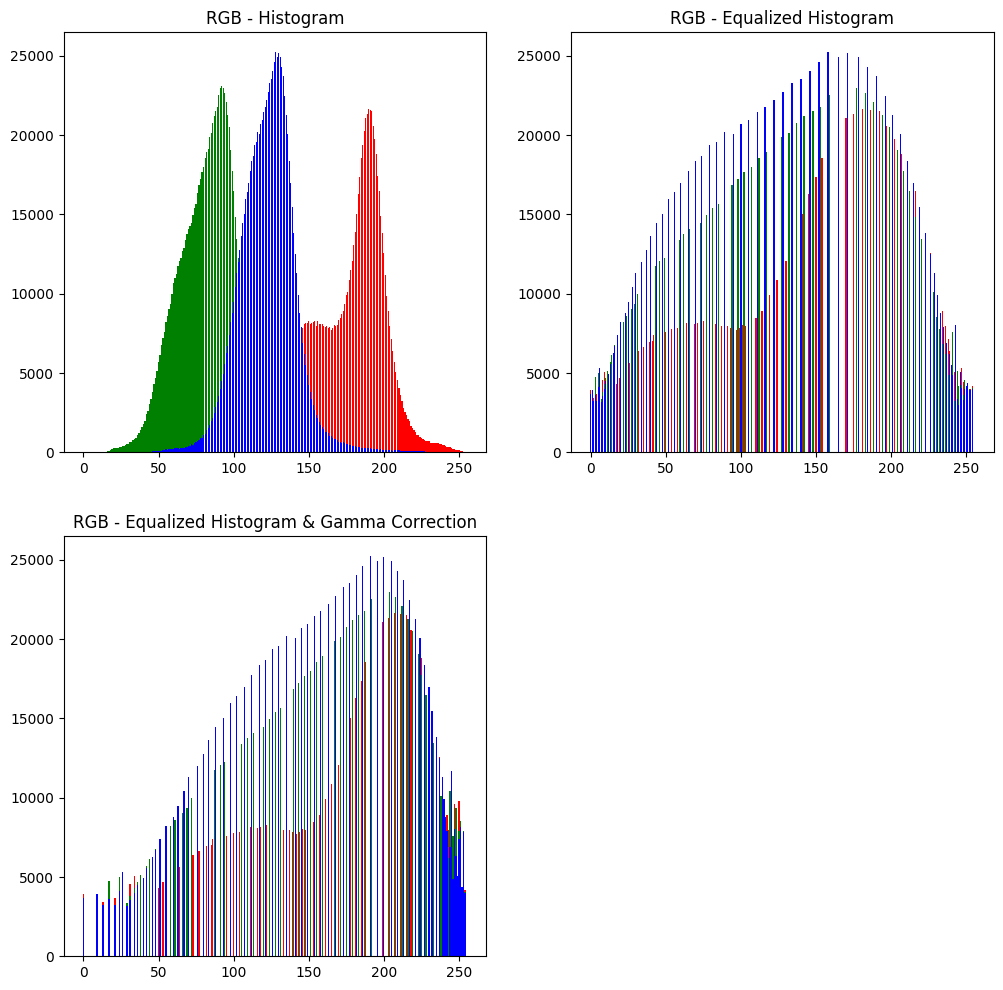

In [16]:
fig = plt.figure(figsize=(12, 12))

rows = 2
columns = 2

stage = ["RGB - Histogram", "RGB - Equalized Histogram", "RGB - Equalized Histogram & Gamma Correction"]

for i, current_img in enumerate([img, img_equalized, img_eq_gamma_corrected]):
    fig.add_subplot(rows, columns, i + 1)
    for j, color in enumerate(["red", "green", "blue"]):
        hist = cv2.calcHist([current_img], [j], None, [256], [0, 255]).reshape((256,))
        plt.bar(x, hist, color=color, label=color)
    plt.title(stage[i])

plt.show()

### RGB - original images vs. corrected images

In [17]:
rgb_images_eq = []
rgb_images_eq_gamma = []

for img in rgb_images:
    channels = cv2.split(img)

    img_equalized = []
    img_eq_gamma_corrected = []

    for channel in channels:
        ch_equalized = equalize_hist(channel, 256)
        ch_eq_gamma_corrected = gamma_correction(ch_equalized, 0.6, 255)

        img_equalized.append(ch_equalized)
        img_eq_gamma_corrected.append(ch_eq_gamma_corrected)

    img_equalized = cv2.merge(img_equalized)
    img_eq_gamma_corrected = cv2.merge(img_eq_gamma_corrected)

    rgb_images_eq.append(img_equalized)
    rgb_images_eq_gamma.append(img_eq_gamma_corrected)

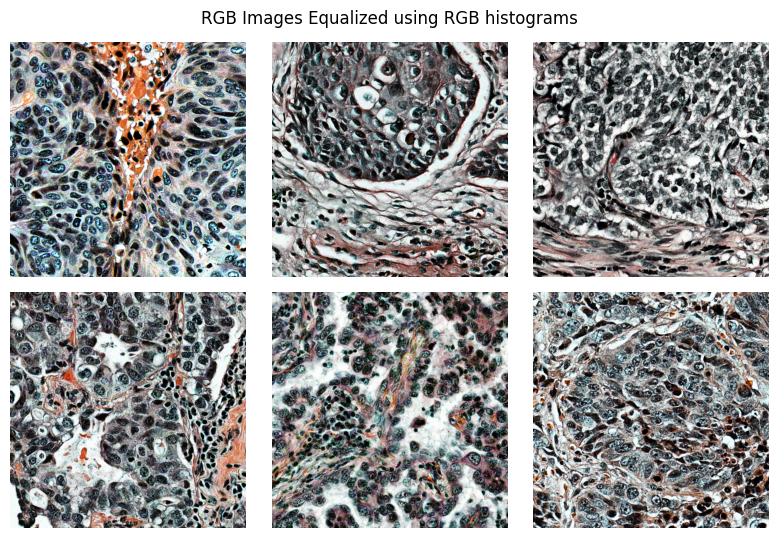

In [18]:
fig = plt.figure(figsize=(8, 8))
fig.suptitle("RGB Images Equalized using RGB histograms")

rows = 3
columns = 3

for i, img in enumerate(rgb_images_eq):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.imshow(img)

plt.tight_layout()
plt.show()

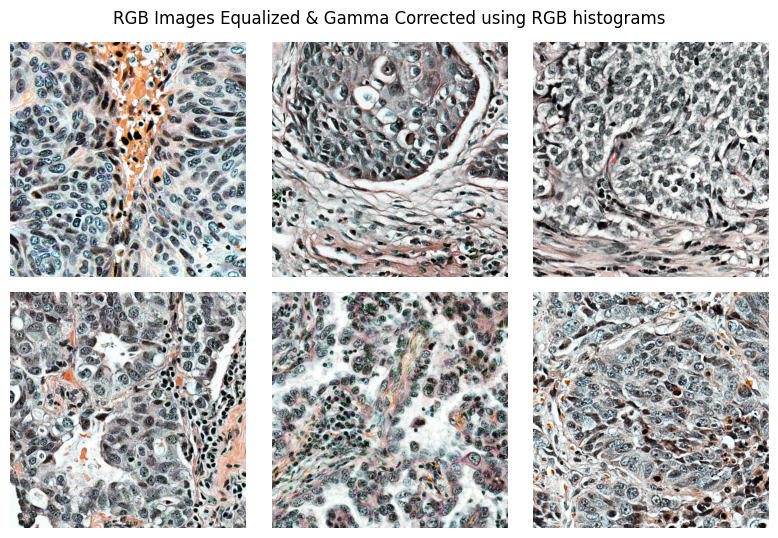

In [19]:
fig = plt.figure(figsize=(8, 8))
fig.suptitle("RGB Images Equalized & Gamma Corrected using RGB histograms")

for i, img in enumerate(rgb_images_eq_gamma):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.imshow(img)

plt.tight_layout()
plt.show()